In [93]:
# importy
import cv2
import cupy as np
import numpy
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

In [94]:
# najde všechny soubory v IN složce, aby se mohl loopnout
inputs_jpg = os.listdir("in/")
inputs = []
for a in inputs_jpg:
    if a[0] == "X":
        continue
    l = len(a)
    short = a[:l - 4]
    inputs.append(short)


In [95]:
# příprava loopu
for actual_img in inputs:
    break
# print(actual_img)
actual_img = "2022_02_23_12_50_13"

In [96]:
# načte BW obrázek
bw = cv2.imread("in/{}.jpg".format(actual_img), 0) # 0 protože chci černobílý obrázek (pro krok úprava)

In [97]:
# zamalování loga UP
bw = cv2.rectangle(bw, (10000, 1211), (11800, 2100), (0), -1)
bw = cv2.rectangle(bw, (0, 1100), (1200, 2800), (0), -1)

# save
cv2.imwrite("debug/1.BW/{}.png".format(actual_img), bw)

True

100%|██████████| 11630/11630 [00:02<00:00, 4485.73it/s]


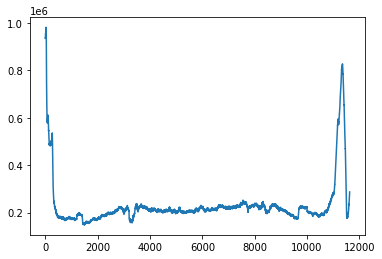

In [98]:
# jedu sloupce (zvrch dolů), cut lft rgh
suma_sloupec = np.array([])

for sloupec in tqdm(range(len(bw[0]))):
    suma_sloupec = np.append(suma_sloupec, np.sum(bw[:, sloupec]))
# print(suma_sloupec)

# plot
plt.plot(suma_sloupec.get())
plt.show()

In [99]:
# find optimal cut
med = np.median(suma_sloupec)
med *= 1.25
medlist = np.where(suma_sloupec < med)[0]
print(med)
ln = len(suma_sloupec)
lnn = ln // 2

h, w = bw.shape[:2]

clft = medlist[0]
crgh = medlist[-1]

for x in tqdm(range(0, w, 10)):
    tmp = numpy.array([])
    for y in range(w//20):
        if suma_sloupec[-y - x] <= med:
            tmp = numpy.append(tmp, y)
    if len(tmp) > w // 20 // 1.5:
        crgh = w - x
        break
        

# for a in range(lnn, ln):
#     # print(a, suma_sloupec[a])
#     if suma_sloupec[a] > med:
#         crgh = a 
#         break
# for a in range(0, lnn):
#     # print(a)
#     # print(a, suma_sloupec[a])
#     if suma_sloupec[a] > med:
#         clft = a 
#         # break

print(clft, crgh)        
# for md in medlist:
#     md *= -1
#     if suma_sloupec[md - 250] < med:
#         crgh = (medlist[md])
#         break
#     if md == medlist[-1]:
# crgh = medlist[-1]


# for md in medlist:
#     if suma_sloupec[md + 250] < med:
#         clft = (medlist[md])
#         break
#     if md == medlist[-1]:
# clft = medlist[0]    

261007.5


  4%|▍         | 51/1163 [00:03<01:17, 14.28it/s]

321 11120


100%|██████████| 8702/8702 [00:01<00:00, 6043.15it/s]


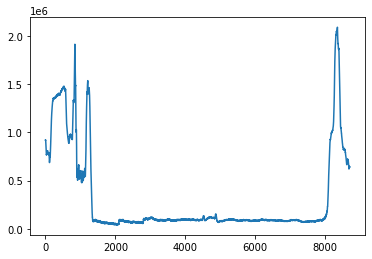

In [100]:
# jedu řádky (zleva do prava)
suma_radek = np.array([])

for radek in tqdm(range(len(bw))):
    suma_radek = np.append(suma_radek, np.sum(bw[radek]))
# print(suma_radek)

# plot
range_radek = range(len(suma_radek))

plt.plot(range_radek, suma_radek.get())
plt.show()

In [101]:
# find optimal cut
med = np.median(suma_radek)
med *= 2
medlist = np.where(suma_radek < med)[0]
print(med)
ln = len(suma_radek)
lnn = ln // 2


ctop = medlist[0]
cbot = medlist[-1]
# for a in range(lnn, ln):
#     # print(a, suma_radek[a])
#     if suma_radek[a] > med:
#         cbot = a 
#         break
# for a in range(0, lnn):
#     # print(a)
#     # print(a, suma_radek[a])
#     if suma_radek[a] > med:
#         ctop = a 
#         # break

# print(clft, crgh)    


# # find optimal cut
# med = np.median(suma_radek)
# medlist = np.where(suma_radek < med)[0]

# cbot = medlist[-1]

# # for md in medlist:
# #     if suma_radek[md - 250] < med:
# #         cbot = (medlist[md])
# #         break
# #     if md == medlist[-1] * -1:
# #         cbot = medlist[-1]


# # for md in medlist:
# #     if suma_radek[md + 250] < med:
# #         ctop = (medlist[md])
# #         break
# #     if md == medlist[-1]:
# ctop = medlist[0]
# #         ctop = medlist[0]


print(ctop, cbot, clft, crgh)

176931.0
1335 8053 321 11120


In [102]:
# cropne obrázky podle předchozích kroků
margin = 0
crp = bw[int(ctop+margin) : int(cbot-margin), int(clft+margin) : int(crgh-margin)]
print(ctop, cbot, clft, crgh)
# print(crp)

# print(crp)

cv2.imwrite("debug/2.cropped/{}.png".format(actual_img), crp)

1335 8053 321 11120


True

In [103]:
def find_otsu(img):
    threshold, _ = cv2.threshold(img, 255, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)   
    return threshold

In [104]:
otsus = []

In [105]:
# první čtverec (napravo)
temp = []
h, w = crp.shape[:2]
base_h = int(h // 2) # height
base_w = int(w * 6 // 7) # width
start = 100 # je poloviční

def check_otsu_crop(value, thresh):
    if value >= thresh:
        value = thresh
    return value


for lp in range(4):
    hst = (base_h - start)
    hen = (base_h + start)
    wst = (base_w - start)
    wen = (base_w + start)

    hst = check_otsu_crop(hst, h)
    hen = check_otsu_crop(hen, h)
    wst = check_otsu_crop(wst, w)
    wen = check_otsu_crop(wen, w)

    # print(hst , hen, wst , wen)
    # print(start * lp)

    otsu_crp = crp[hst : hen, wst : wen]
    # print(otsu_crp)
    start *= 2
    # break
    temp.append(find_otsu(otsu_crp))
otsus.append(temp)


In [106]:
# druhý čtverec (nalevo)
temp = []
h, w = crp.shape[:2]
base_h = int(h // 2) # height
base_w = int(w * 5 // 7) # width
start = 100 # je poloviční

def check_otsu_crop(value, thresh):
    if value >= thresh:
        value = thresh
    return value


for lp in range(4):
    hst = (base_h - start)
    hen = (base_h + start)
    wst = (base_w - start)
    wen = (base_w + start)

    hst = check_otsu_crop(hst, h)
    hen = check_otsu_crop(hen, h)
    wst = check_otsu_crop(wst, w)
    wen = check_otsu_crop(wen, w)

    # print(hst , hen, wst , wen)
    # print(start * lp)

    otsu_crp = crp[hst : hen, wst : wen]
    # print(otsu_crp)
    start *= 2
    # break
    temp.append(find_otsu(otsu_crp))
otsus.append(temp)


In [107]:
# třetí čtverec (dole)
temp = []
h, w = crp.shape[:2]
base_h = int(h * 3 // 4) # height
base_w = int(w * 5.5 // 7) # width
start = 100 # je poloviční

def check_otsu_crop(value, thresh):
    if value >= thresh:
        value = thresh
    return value


for lp in range(4):
    hst = (base_h - start)
    hen = (base_h + start)
    wst = (base_w - start)
    wen = (base_w + start)

    hst = check_otsu_crop(hst, h)
    hen = check_otsu_crop(hen, h)
    wst = check_otsu_crop(wst, w)
    wen = check_otsu_crop(wen, w)

    # print(hst , hen, wst , wen)
    # print(start * lp)

    otsu_crp = crp[hst : hen, wst : wen]
    # print(otsu_crp)
    start *= 2
    # break
    temp.append(find_otsu(otsu_crp))
otsus.append(temp)


In [108]:
# čtvrtý čtverec(nahořš)
temp = []
h, w = crp.shape[:2]
base_h = int(h * 1 // 4) # height
base_w = int(w * 5.5 // 7) # width
start = 100 # je poloviční

def check_otsu_crop(value, thresh):
    if value >= thresh:
        value = thresh
    return value


for lp in range(4):
    hst = (base_h - start)
    hen = (base_h + start)
    wst = (base_w - start)
    wen = (base_w + start)

    hst = check_otsu_crop(hst, h)
    hen = check_otsu_crop(hen, h)
    wst = check_otsu_crop(wst, w)
    wen = check_otsu_crop(wen, w)

    # print(hst , hen, wst , wen)
    # print(start * lp)

    otsu_crp = crp[hst : hen, wst : wen]
    # print(otsu_crp)
    start *= 2
    # break

    temp.append(find_otsu(otsu_crp))
otsus.append(temp)


In [109]:
# threshold
otsus = np.array(otsus)
otsus.max()
print(otsus)
print(otsus.max())
_, th_otsu = cv2.threshold(crp, int(otsus.max()), 255, cv2.THRESH_BINARY)
cv2.imwrite("debug/3.Otsu/{}.png".format(actual_img), th_otsu)

[[23. 22. 22. 23.]
 [23. 37. 35. 32.]
 [ 2.  2.  3.  3.]
 [10. 11. 13. 10.]]
37.0


True

In [110]:
th_otsu = np.uint8(th_otsu)

In [111]:
# kontury
# print(th_otsu)
raw_cnts = cv2.findContours(th_otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# print(raw_cnts)

In [112]:
def filtrAreaDumb(raw_cnts, thresh):
    out = []
    for cnt in raw_cnts[0]:
        # print(cnt)
        area = cv2.contourArea(cnt)
        if area > thresh:   
            out.append(cnt)
    # print(out)
    return out

In [113]:
def filtrAreaSmart (cnts):
    thresh = 10
    numbr = 100
    while True:
        temp = filtrAreaDumb(cnts, thresh)
        thresh += 10
        if len(temp) < numbr:
            return temp

In [114]:
area_cnts = filtrAreaSmart(raw_cnts)

In [115]:
orig = cv2.imread("in/{}.jpg".format(actual_img)).astype("float64")

orig = orig[int(ctop+margin) : int(cbot-margin), int(clft+margin) : int(crgh-margin)]

# zamalování loga UP
orig = cv2.rectangle(orig, (10000, 1211), (11800, 1930), (0), -1)
orig = cv2.rectangle(orig, (0, 1100), (860, 2700), (0), -1)
# print(orig)

# modře ty, co jsou vyfiltrovaný ven
# orig = cv2.drawContours(orig, filtrAreaDumb(raw_cnts, 0), -1, (255, 0, 0), 10)
orig = cv2.drawContours(orig, raw_cnts[0], -1, (255, 0, 0), 10)
# červeně co zůstaly
orig = cv2.drawContours(orig, area_cnts, -1, (0, 0, 255), 20)

cv2.imwrite("debug/4.area_filtr/{}.png".format(actual_img), orig)

True